In [1]:
import importlib#, sbmtm_developer
#import graph_tool.all as gt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle, math
import sys
import seaborn as sns

In [2]:
directory = 'hsbm_NewDataset/3D_ORs/maxB_180/'

In [69]:
clusts = pd.read_csv('hsbm_NewDataset/AP_OR_svg/fitted/topsbm_level_0_clusters.csv')
clusts.iloc[:,15:18]

,Cluster 16,Cluster 17,Cluster 18
0,Olfr1359,Olfr1309,Olfr285
1,Olfr921,Olfr711,Olfr213
2,Olfr1212,Olfr193,Olfr357
3,Olfr1364,Olfr1098,Olfr1257
4,Olfr1229,Olfr167,Olfr1099
...,...,...,...
70,NaN,NaN,NaN
71,NaN,NaN,NaN
72,NaN,NaN,NaN
73,NaN,NaN,NaN


In [70]:
AP_genes = []

AP_genes = AP_genes + (list(clusts.iloc[:,0].values[~pd.isnull(clusts.iloc[:,0])]))
AP_genes = AP_genes + (list(clusts.iloc[:,1].values[~pd.isnull(clusts.iloc[:,1])]))
AP_genes = AP_genes + (list(clusts.iloc[:,10].values[~pd.isnull(clusts.iloc[:,10])]))
AP_genes = AP_genes + (list(clusts.iloc[:,23].values[~pd.isnull(clusts.iloc[:,23])]))
AP_genes = AP_genes + (list(clusts.iloc[:,15:18].values[~pd.isnull(clusts.iloc[:,15:18])]))
AP_genes = AP_genes + (list(clusts.iloc[:,24].values[~pd.isnull(clusts.iloc[:,24])]))
AP_genes = AP_genes + (list(clusts.iloc[:,26].values[~pd.isnull(clusts.iloc[:,26])]))

AP_genes

['Olfr1',
 'Olfr1208',
 'Olfr75-ps1',
 'Olfr142',
 'Olfr1355',
 'Olfr1124',
 'Olfr1123',
 'Olfr912',
 'Olfr391',
 'Olfr1535',
 'Olfr138',
 'Olfr1380',
 'Olfr1116',
 'Olfr1251',
 'Olfr380',
 'Olfr125',
 'Olfr378',
 'Olfr1424',
 'Olfr1246',
 'Olfr801',
 'Olfr789',
 'Olfr1300-ps1',
 'Olfr293',
 'Olfr297',
 'Olfr291',
 'Olfr771',
 'Olfr1314',
 'Olfr1185-ps1',
 'Olfr67',
 'Olfr396-ps1',
 'Olfr537-ps1',
 'Olfr1402',
 'Olfr312',
 'Olfr659',
 'Olfr896-ps1',
 'Olfr9',
 'Olfr904',
 'Olfr1446',
 'Olfr305',
 'Olfr543',
 'Olfr1351',
 'Olfr596',
 'Olfr366',
 'Olfr650-ps1',
 'Olfr919',
 'Olfr298',
 'Olfr1105',
 'Olfr792',
 'Olfr678',
 'Olfr388-ps1',
 'Olfr114',
 'Olfr1249',
 'Olfr822',
 'Olfr692',
 'Olfr1133',
 'Olfr826',
 'Olfr828',
 'Olfr512',
 'Olfr832',
 'Olfr351',
 'Olfr69',
 'Olfr1160',
 'Olfr377-ps1',
 'Olfr521',
 'Olfr338',
 'Olfr333-ps1',
 'Olfr1390',
 'Olfr920',
 'Olfr651',
 'Olfr753-ps1',
 'Olfr435',
 'Olfr1331',
 'Olfr1432',
 'Olfr251',
 'Olfr1218',
 'Olfr243',
 'Olfr607',
 'Olfr202',
 'O

In [94]:
AP_genes = list(set(AP_genes) & set(df.columns.values))
df.loc[:,AP_genes]

,Olfr263,Olfr243,Olfr1097,Olfr1204,Olfr1424,Olfr393,Olfr1116,Olfr923,Olfr692,Olfr1257,...,Olfr391,Olfr729,Olfr60,Olfr789,Olfr1241,Olfr944,Olfr1535,Olfr213,Olfr301,Olfr535
1-15-46,1.353829,0.231923,0.897754,0.755703,0.097807,0.0,0.172900,0.571774,0.253199,1.348857,...,0.309489,1.105542,0.924295,0.370436,1.108633,0.0,0.081493,0.724179,0.024892,0.580626
1-15-47,1.398830,0.216324,0.919246,0.800411,0.097682,0.0,0.174258,0.540556,0.241793,1.365193,...,0.313412,1.144427,0.942487,0.369334,1.128397,0.0,0.081592,0.737830,0.024232,0.589687
1-15-48,1.447235,0.199455,0.941982,0.849435,0.097601,0.0,0.175760,0.508741,0.229410,1.382435,...,0.317712,1.185821,0.961516,0.368053,1.149323,0.0,0.081690,0.752239,0.023535,0.599025
1-15-49,1.499058,0.181310,0.965968,0.902787,0.097562,0.0,0.177405,0.476302,0.216039,1.400588,...,0.322388,1.229730,0.981387,0.366588,1.171413,0.0,0.081785,0.767409,0.022801,0.608640
1-15-50,1.554309,0.161881,0.991208,0.960477,0.097566,0.0,0.179195,0.443212,0.201669,1.419653,...,0.327440,1.276165,1.002104,0.364934,1.194668,0.0,0.081876,0.783341,0.022028,0.618533
1-16-46,1.354538,0.270105,0.866395,0.730177,0.095255,0.0,0.167921,0.608756,0.286574,1.311996,...,0.302087,1.087251,0.897469,0.367450,1.067881,0.0,0.080349,0.700958,0.024156,0.559029
1-16-47,1.399562,0.251937,0.887136,0.773375,0.095133,0.0,0.169240,0.575520,0.273665,1.327885,...,0.305917,1.125492,0.915133,0.366357,1.086918,0.0,0.080448,0.714171,0.023516,0.567753
1-16-48,1.447993,0.232292,0.909078,0.820743,0.095054,0.0,0.170699,0.541647,0.259650,1.344656,...,0.310114,1.166201,0.933610,0.365086,1.107075,0.0,0.080544,0.728118,0.022839,0.576743
1-16-49,1.499843,0.211159,0.932226,0.872293,0.095016,0.0,0.172297,0.507110,0.244516,1.362313,...,0.314678,1.209384,0.952904,0.363633,1.128352,0.0,0.080638,0.742802,0.022127,0.586001
1-16-50,1.555123,0.188532,0.956584,0.928034,0.095020,0.0,0.174035,0.471879,0.228252,1.380858,...,0.319609,1.255051,0.973019,0.361992,1.150753,0.0,0.080727,0.758223,0.021377,0.595526


In [95]:
with open('AP_cluster_genes.txt','w') as f:
    for item in AP_genes:
        f.write('%s\n' %(item))

In [40]:
counts  = 0
for gene in df.columns:
    if(len(df_test[gene][df_test[gene]<0.1]) > 0.1*len(df_test.index)):
        print(gene)
        counts += 1
counts

Olfr157
Olfr457
Olfr620
Olfr867
Olfr919
Olfr617
Olfr155
Olfr243
Olfr272
Olfr273
Olfr448
Olfr561
Olfr570
Olfr572
Olfr575
Olfr586
Olfr600
Olfr605
Olfr606
Olfr608
Olfr612
Olfr622
Olfr629
Olfr633
Olfr639
Olfr652
Olfr68
Olfr69
Olfr267
Olfr450
Olfr566
Olfr592
Olfr67
Olfr822
Olfr924
Olfr982


36

In [4]:
model_3D = pickle.load(open('%stopsbm.pkl' %(directory),'rb')) 
model_3D

In [ ]:
V = model_3D.get_V()
D = model_3D.get_D()
N = model_3D.get_N()


g = model_3D.g
state = model_3D.state
state_l = state.project_level(1).copy(overlap=True)
state_l_edges = state_l.get_edge_blocks() ## labeled half-edges

        ## count labeled half-edges, group-memberships
B = state_l.B
n_wb = np.zeros((V,B)) ## number of half-edges incident on word-node w and labeled as word-group tw
n_db = np.zeros((D,B)) ## number of half-edges incident on document-node d and labeled as document-group td
n_dbw = np.zeros((D,B)) ## number of half-edges incident on document-node d and labeled as word-group tw

for e in g.edges():
    z1,z2 = state_l_edges[e]
    v1 = e.source()
    v2 = e.target()
    n_db[int(v1),z1] += 1
    n_dbw[int(v1),z2] += 1
    n_wb[int(v2)-D,z2] += 1


In [ ]:
nonzero_genes = np.where(np.sum(n_db, axis = 1) != 0)[0] #
len(np.where(np.sum(n_db, axis = 1) != 0)[0])

In [27]:
genes = np.array(model_3D.documents)[list(nonzero_genes)]

In [28]:
p_w = np.sum(n_wb,axis=1)/float(np.sum(n_wb))


ind_d = np.where(np.sum(n_db,axis=0)>0)[0]
Bd = len(ind_d)
n_db = n_db[:,ind_d] #selecting only the groups that are incident to at least one document

ind_w = np.where(np.sum(n_wb,axis=0)>0)[0]
Bw = len(ind_w)
n_wb = n_wb[:,ind_w]

ind_w2 = np.where(np.sum(n_dbw,axis=0)>0)[0]
n_dbw = n_dbw[:,ind_w2]

correction = pd.DataFrame(n_wb)
correction = correction.loc[~(correction==0).all(axis=1)]
n_wb = np.array(correction)

correction_d = pd.DataFrame(n_db)
correction_d = correction_d.loc[~(correction_d==0).all(axis=1)]
n_db = np.array(correction_d)

correction_dbw = pd.DataFrame(n_dbw)
correction_dbw = correction_d.loc[~(correction_dbw==0).all(axis=1)]
n_dbw = np.array(correction_dbw)

#p_tw_w_2 = (n_wb/np.sum(n_wb,axis=1)[:,np.newaxis]).T
p_td_d_2 = (n_db/np.sum(n_db,axis=1)[:,np.newaxis]).T
p_tw_d_2 = (n_dbw/np.sum(n_dbw,axis=1)[:,np.newaxis]).T

In [29]:
cluster_labels = []
for i in range(p_td_d_2.shape[0]):
    cluster_labels.append("Cluster%s" %(i))

In [30]:
df_d_t = pd.DataFrame(p_td_d_2.T, index = genes, columns = cluster_labels)
df_d_t.to_csv("%s/p_td_d_l2.csv" %(directory))

In [31]:
n = -1
docs = genes
p_td_d = p_td_d_2#p_td_d_2
## loop over all word-groups
dict_clusters = {}
for td in range(Bd):
    p_d_ = p_td_d[td,:]
    ind_d_ = np.argsort(p_d_)[::-1]
    list_docs_td = []
    for i in ind_d_[:n]:
        if p_d_[i] > 0:
            list_docs_td+=[(docs[i],p_d_[i])]
        else:
            break
    dict_clusters[td] = list_docs_td

In [32]:
list_clusters = sorted(list(dict_clusters.keys()))
list_columns = ['Cluster %s'%(t+1) for t in list_clusters]

T = len(list_clusters)
clusters = pd.DataFrame(columns = list_columns,index=range(len(nonzero_genes)))
for t in list_clusters:
            list_d = [h[0] for h in dict_clusters[t]]
            D_t = len(list_d)
            clusters.iloc[:D_t,t] = list_d
clusters=clusters.dropna(how='all',axis=0)
        
clusters.to_csv('%stopsbm_level_2_clusters.csv'%(directory),index=False,na_rep='')
            


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14
0,Olfr1025-ps1,Olfr776,Olfr96,Olfr740,Olfr1195,Olfr140,Olfr1213,Olfr533,Olfr183,Olfr527,Olfr69,Olfr541,Olfr1110,Olfr727
1,Olfr1224-ps1,Olfr1097,Olfr1015,Olfr12,Olfr923,Olfr6,Olfr1260,Olfr1427,Olfr195,Olfr788,Olfr609,Olfr309,Olfr1426,Olfr1228
2,Olfr536,Olfr1308,Olfr392,Olfr1262,Olfr961,Olfr1261,Olfr169,Olfr166,Olfr1347,Olfr175,Olfr969,Olfr211,Olfr1428,Olfr1384
3,Olfr1038-ps,Olfr1383,Olfr365,Olfr1349,Olfr1204,Olfr168,Olfr743,Olfr1301,Olfr31,Olfr733,Olfr237,Olfr449,NaN,Olfr1257
4,Olfr839-ps1,Olfr1423,Olfr332,Olfr1382,Olfr5,Olfr330,Olfr1226,NaN,Olfr1281,Olfr1290,Olfr24,Olfr220,NaN,Olfr1507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,NaN,NaN,NaN,Olfr126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,Olfr1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,Olfr1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,Olfr1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
dict_topics = model_3D.topics(l=2,n=-1)
list_topics = sorted(list(dict_topics.keys()))
list_columns = ['i_doc','doc']+['Topic %s'%(t+1) for t in list_topics]
df_topic_dist = pd.DataFrame(columns=list_columns,index=range(len(genes)))
for i_doc in range(len(genes)):
            list_topicdist = model_3D.topicdist(nonzero_genes[i_doc],l=2)
            df_topic_dist.iloc[i_doc,0] = i_doc
            df_topic_dist.iloc[i_doc,1] = model_3D.documents[nonzero_genes[i_doc]]
            df_topic_dist.iloc[i_doc,2:] = [h[1] for h in list_topicdist]
#df_topic_dist.to_csv('%stopsbm_level_2_topic-dist.csv'%(directory))

In [10]:
topic_dist = pd.read_csv('%stopsbm_level_2_topic-dist.csv'%(directory), index_col = [2])
topic_dist = topic_dist.iloc[:,2:]


In [11]:
with open('markers.txt','r') as f:
    markers = [line.rstrip() for line in f]

markers = [a_ for a_ in markers if a_ in topic_dist.index]
topic_dist = topic_dist.loc[markers,:]
topic_dist

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
doc,,,,,,,,,,
Olfr24,0.000000,0.000000,0.232075,0.261635,0.000000,0.496226,0.000000,0.000000,0.000000,0.010063
Olfr1395,0.000000,0.000000,0.000000,0.006566,0.000000,0.749807,0.234647,0.008980,0.000000,0.000000
Olfr1352,0.000000,0.000000,0.000000,0.000000,0.000000,0.413793,0.586207,0.000000,0.000000,0.000000
Olfr449,0.056009,0.027686,0.000510,0.023305,0.283661,0.147444,0.190014,0.194565,0.062303,0.014502
Olfr211,0.097333,0.018544,0.000000,0.000000,0.345391,0.081621,0.193752,0.177583,0.075454,0.010322
Olfr1415,0.176542,0.000000,0.000000,0.000000,0.547084,0.000000,0.004086,0.131315,0.140973,0.000000
Olfr398,0.045004,0.000000,0.000000,0.000000,0.781869,0.000000,0.000000,0.073428,0.099699,0.000000
Olfr1412,0.000000,0.000000,0.000000,0.000000,0.744245,0.000000,0.000000,0.113139,0.142617,0.000000
Olfr531,0.000000,0.003762,0.000000,0.000458,0.224070,0.231137,0.216087,0.249136,0.059996,0.015355


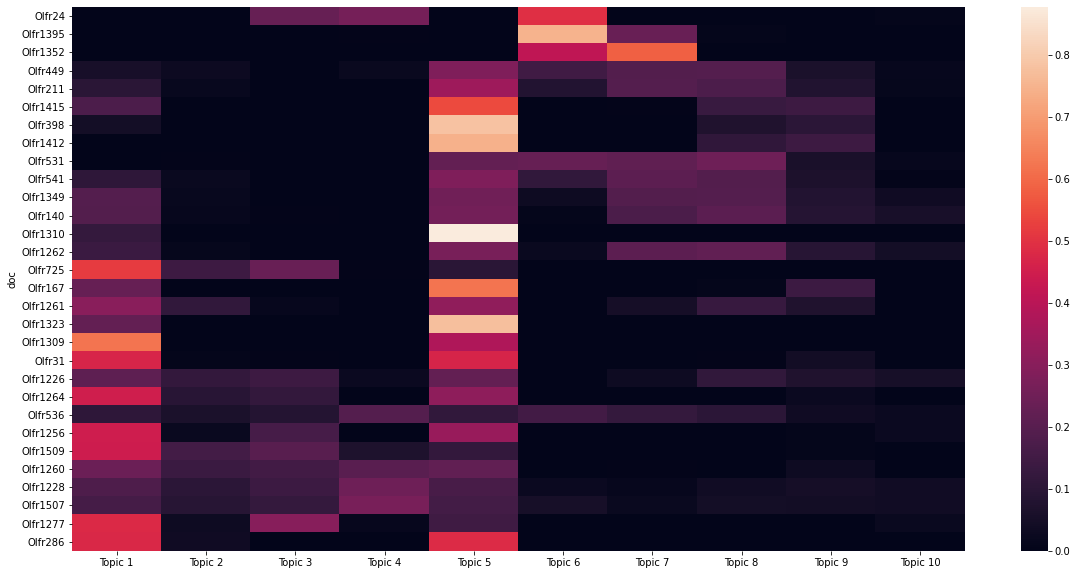

In [15]:
fig = plt.figure(figsize=[20,10])
sns.heatmap(topic_dist)
plt.savefig('%smarkers_heatmap.png' %(directory))

In [59]:
p_w_tw_2 = pd.read_csv('%stopsbm_level_2_word-dist.csv'%(directory))#, index_col = [0])

In [44]:
no_topics = len(p_w_tw_2.columns)
labels = []
for i in range(no_topics):
    labels.append("Topic%s" %(i+1))

In [43]:
df_files = df.index

coord_DV = []
coord_AP = []
coord_LML = []
for item in df_files:
    coord_DV.append(int(item.split("-")[0]))
    coord_LML.append(int(item.split("-")[1]))
    coord_AP.append(int(item.split("-")[2]))

In [80]:
p_w_tw_2

,Unnamed: 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,1-15-46,0.000114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1-15-47,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1-15-48,0.000120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1-15-49,0.000124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1-15-50,0.000128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
77405,9-9-56,0.000137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77406,9-9-57,0.000149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77407,9-9-58,0.000154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77408,9-9-59,0.000158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
p_w_tw_2
pos_to_topic = []

for i in range(len(p_w_tw_2.index)):
    pos_to_topic.append(np.nonzero(p_w_tw_2.iloc[i,1:].values)[0][0] + 1)

In [85]:
pos_to_topic

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 3,


In [87]:
single_coord = pd.DataFrame({'DV':coord_DV,'LML':coord_LML,'AP':coord_AP})
p_w_tw = pd.concat([single_coord,p_w_tw_2.iloc[:,1:]], axis = 1)#.to_csv('%sp_w_tw_R.csv'%(directory))

In [88]:
p_w_tw['pos_to_topic'] = pos_to_topic

In [89]:
p_w_tw.to_csv('%sp_w_tw_R.csv'%(directory))

In [33]:
## see markers distributions

markers_indexes = pd.read_csv("zones_indexes.csv", index_col = [0])
m= []
present = []
for item in markers_indexes.index:
    c = np.where(genes == item)
    
    if len(c[0]) > 0:
        m.append(c[0][0])
        present.append(item)
        
len(present)

30

## Compare lda and hsbm results

In [13]:
lda_transpose = pd.read_csv('hsbm_NewDataset/LDA/10_topics/p_w_tw_R.csv',index_col = [0])
lda_transpose.head()
lda_transpose_pos = lda_transpose.pos_to_topic.values

In [15]:
hsbm = pd.read_csv('hsbm_NewDataset/3D_ORs/p_w_tw_R.csv',index_col = [0])
hsbm.head()
hsbm_pos = hsbm.pos_to_topic.values

In [29]:
hsbm_8 = pd.read_csv('hsbm_NewDataset/3D_ORs/maxB_180/topsbm_level_3_word-dist.csv',index_col = [0])
hsbm_8.head()
hsbm_8_pos = np.argmax(hsbm_8.values,axis = 1)
hsbm_8_pos

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
GoMfit = pd.read_csv('hsbm_NewDataset/LDA/Countclust_8topics/Countclust_8topics_word-dist.csv', sep = "\t",index_col = [0])
GoMfit.head()
GoMfit_pos = np.argmax(GoMfit.values,axis = 1)

In [32]:
from scipy.stats import spearmanr


#rho,pvalue = spearmanr(lda_transpose_pos,hsbm_pos)
rho,pvalue = spearmanr(GoMfit_pos, hsbm_8_pos)
rho

-0.4277336039049937

In [20]:
rho

0.33879527968481893

## Use LDA pos|topic to determine DEGS proportion to topics

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100000))

In [10]:
lda_log = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/P_word_topics.csv", index_col = [0])
lda_log


,1,2,3,4,5,6,7,8
wrd 1,1.249224e-13,1.778755e-05,3.563501e-13,5.677492e-13,0.000013,0.000055,0.000078,0.000012
wrd 2,1.262968e-13,1.619897e-05,3.579014e-13,5.818466e-13,0.000013,0.000060,0.000088,0.000014
wrd 3,1.279117e-13,1.457113e-05,3.605019e-13,5.976417e-13,0.000012,0.000066,0.000100,0.000017
wrd 4,1.298336e-13,1.291630e-05,3.643694e-13,6.142587e-13,0.000011,0.000074,0.000114,0.000021
wrd 5,1.321558e-13,1.124696e-05,3.698155e-13,6.286896e-13,0.000010,0.000083,0.000131,0.000027
...,...,...,...,...,...,...,...,...
wrd 77406,2.014185e-06,1.360673e-06,2.003712e-09,8.024679e-06,0.000007,0.000132,0.000042,0.000097
wrd 77407,1.533760e-06,4.336260e-07,2.973335e-10,7.528895e-06,0.000006,0.000152,0.000048,0.000123
wrd 77408,8.021059e-07,5.227384e-13,9.083298e-12,7.117803e-06,0.000005,0.000177,0.000054,0.000159
wrd 77409,4.859964e-08,1.767099e-13,1.465451e-12,6.501587e-06,0.000003,0.000205,0.000061,0.000206


In [63]:
lda_raw = pd.read_csv("hsbm_NewDataset/LDA/Countclust_rawcounts/tmax/Countclust_topics_word-dist.csv",sep = "\t", index_col = [0])
lda_raw

,1,2,3,4,5,6,7,8,9,10,11
1-15-46,1.391939e-13,2.698546e-05,7.334790e-08,4.393946e-13,4.048346e-13,2.636291e-07,1.509224e-12,4.780460e-05,0.000025,0.000066,0.000014
1-15-47,1.390860e-13,2.459113e-05,1.007684e-07,4.330366e-13,4.015902e-13,1.519907e-07,1.078328e-12,5.031320e-05,0.000025,0.000074,0.000016
1-15-48,1.387094e-13,2.215299e-05,1.261188e-07,4.265453e-13,3.976230e-13,8.753747e-08,8.896849e-13,5.290385e-05,0.000024,0.000085,0.000019
1-15-49,1.382376e-13,1.968776e-05,1.498596e-07,4.204959e-13,3.939423e-13,5.290480e-08,7.846504e-13,5.557638e-05,0.000023,0.000098,0.000023
1-15-50,1.378023e-13,1.721086e-05,1.735876e-07,4.153217e-13,3.914118e-13,3.521376e-08,7.148104e-13,5.831578e-05,0.000022,0.000114,0.000027
...,...,...,...,...,...,...,...,...,...,...,...
9-9-56,4.762282e-07,1.035343e-08,5.853378e-06,1.175428e-07,2.619051e-07,2.672244e-05,1.877648e-06,3.580087e-06,0.000020,0.000150,0.000081
9-9-57,4.247374e-07,6.325058e-13,3.164136e-06,1.880618e-08,2.740377e-07,2.831773e-05,1.503662e-06,2.067041e-06,0.000018,0.000177,0.000103
9-9-58,3.181420e-07,3.058582e-13,9.670963e-07,1.125869e-09,3.351274e-07,2.964737e-05,1.105376e-06,8.415241e-07,0.000016,0.000209,0.000134
9-9-59,8.016159e-11,3.326876e-13,2.253563e-09,7.424563e-12,1.928481e-07,3.060399e-05,8.724968e-07,2.079730e-07,0.000013,0.000246,0.000175


In [289]:
gene = pd.read_csv("Myra_dataset/3Ddataset/3Ddataset/allDEGs3D_dataset_fitVals_countsFormat.csv", index_col = [0], skiprows = 10000, header = None, nrows = 2000)
gene

,1,2,3,4,5,6,7,8,9,10,...,77401,77402,77403,77404,77405,77406,77407,77408,77409,77410
0,,,,,,,,,,,,,,,,,,,,,
Tenm3,0.801875,0.813168,0.824716,0.836519,0.848578,0.814065,0.825529,0.837252,0.849235,0.861477,...,0.792921,0.804495,0.816302,0.828342,0.840614,0.859327,0.872154,0.885213,0.898504,0.912026
Tenm4,1.099561,1.110944,1.122771,1.135040,1.147750,1.118827,1.130409,1.142443,1.154927,1.167860,...,1.026062,1.038075,1.050477,1.063266,1.076443,1.105141,1.119283,1.133814,1.148735,1.164045
Tent2,1.079349,1.086058,1.092705,1.099287,1.105801,1.093141,1.099935,1.106667,1.113333,1.119930,...,1.079360,1.085538,1.091638,1.097658,1.103594,1.112632,1.118406,1.124087,1.129669,1.135150
Tent4a,0.875254,0.878363,0.881139,0.883580,0.885682,0.883291,0.886429,0.889230,0.891694,0.893815,...,0.840073,0.841414,0.842425,0.843105,0.843450,0.859722,0.859382,0.858691,0.857647,0.856247
Tent4b,0.948552,0.953262,0.957941,0.962590,0.967211,0.962071,0.966847,0.971592,0.976308,0.980995,...,0.918510,0.922825,0.927114,0.931379,0.935619,0.944167,0.948380,0.952570,0.956739,0.960885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zw10,1.079666,1.085388,1.090879,1.096135,1.101152,1.086136,1.091893,1.097416,1.102704,1.107750,...,1.020252,1.024428,1.028374,1.032084,1.035556,1.049477,1.052494,1.055258,1.057768,1.060020
Zwint,1.679543,1.680163,1.680491,1.680526,1.680266,1.690914,1.691538,1.691868,1.691903,1.691642,...,1.665647,1.664802,1.663662,1.662225,1.660490,1.680835,1.678470,1.675800,1.672823,1.669538
Zyg11b,0.824431,0.833080,0.841835,0.850693,0.859656,0.840866,0.849688,0.858617,0.867652,0.876793,...,0.876904,0.886157,0.895513,0.904970,0.914527,0.936053,0.945934,0.955916,0.965996,0.976173


In [11]:
gene_names = [a.split(":")[1] for a in gene.index.values]
gene.index = [gene_names]

In [175]:
gene = np.log(10 ** gene) 

In [20]:
for i in range(len(gene.index)):
    X = gene.iloc[i,:].values.reshape(len(gene.columns),1)
    gene.iloc[i,:] = min_max_scaler.fit_transform(X).reshape(len(gene.columns),)
    
gene

,1-15-46,1-15-47,1-15-48,1-15-49,1-15-50,1-16-46,1-16-47,1-16-48,1-16-49,1-16-50,...,9-9-51,9-9-52,9-9-53,9-9-54,9-9-55,9-9-56,9-9-57,9-9-58,9-9-59,9-9-60
Olfr1,10901.410610,10794.911581,10680.841234,10559.065914,10429.451969,10742.186579,10636.695851,10523.705488,10403.083100,10274.696301,...,35558.713254,35185.900703,34792.003830,34376.680627,33939.589089,33037.615667,32561.374673,32062.595509,31540.940012,30996.070021
Olfr1000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13723.937159,12650.933809,11478.589379,10206.058255,8832.494829,6639.402154,5215.180999,3697.493465,2085.576428,378.666762
Olfr1006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18347.257979,16275.932065,14061.740238,11703.865822,9201.492143,6066.702738,3480.526405,758.322528,0.000000,0.000000
Olfr1009,40125.056963,38457.655467,36590.425351,34520.760198,32246.053595,43674.582246,41859.679806,39827.271594,37574.520626,35098.589919,...,27313.304902,24842.374002,22176.106859,19312.111639,16247.996509,13508.272042,9895.835213,6067.689032,2021.344583,0.000000
Olfr101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21738.828074,19796.626562,17713.910464,15489.648876,13122.810893,10071.322954,7551.601692,4893.637865,2096.453127,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr987,26867.060675,25519.533967,24042.375235,22434.501530,20694.829902,28289.347968,26870.485950,25315.129453,23622.138200,21790.371910,...,27998.462953,25013.735236,21828.123108,18440.015661,14847.801989,10834.149782,6907.083708,2775.157703,0.000000,0.000000
Olfr988,29399.518786,28122.776805,26706.746975,25150.201085,23451.910930,31278.394923,29920.058409,28413.532381,26757.510138,24950.684979,...,28721.162781,26082.425885,23250.409880,20223.482443,17000.011251,13677.886479,10029.887380,6178.971097,2123.493344,0.000000
Olfr99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23362.736729,21399.607305,19283.133627,17012.106395,14585.316308,11142.801670,8597.053460,5903.319451,3060.476874,67.402957
Olfr992,6115.729965,5879.551914,5621.454680,5341.279992,5038.869577,6379.365207,6133.006056,5863.782837,5571.530454,5256.083812,...,25334.069986,23467.324761,21478.529773,19366.834441,17131.388186,14612.497064,12153.725004,9570.008476,6860.506045,4024.376278


In [17]:
for i in range(len(lda_log.columns)):
    X = lda_log.iloc[:,i].values.reshape(len(lda_log.index),1)
    lda_log.iloc[:,i] = min_max_scaler.fit_transform(X).reshape(len(lda_log.index),)
    
lda_log

,1,2,3,4,5
1-15-46,0.000471,42156.912824,0.001987,0.002140,58481.216525
1-15-47,0.000467,39864.712130,0.001781,0.002104,60344.140944
1-15-48,0.000463,37387.288289,0.001586,0.002071,62336.852953
1-15-49,0.000460,34723.825308,0.001404,0.002041,64459.150863
1-15-50,0.000457,31873.411115,0.001236,0.002016,66710.908944
...,...,...,...,...,...
9-9-56,8994.436541,6487.050158,17841.166743,4581.652179,63215.124741
9-9-57,7086.238381,2954.020256,19272.378927,4094.312952,65877.875043
9-9-58,4708.627519,292.520783,21593.397709,2957.046638,68336.029122
9-9-59,1533.694674,0.004440,25181.347079,162.497006,70521.684027


In [21]:
doc_topics = {}

for r in ["Olfr1","Olfr1000"]:#gene.index:

    gene_to_topic = []
    print(r)
    for c in lda_log.columns:
       # print(len())
        gene_to_topic.append(np.mean(gene.loc[r,:].values * lda_log[c]))
       
    gene_to_topic = gene_to_topic/np.sum(gene_to_topic)
    doc_topics[r] = gene_to_topic

Olfr1
Olfr1000


In [22]:
doc_topics

{'Olfr1': array([0.28522931, 0.17294274, 0.30412497, 0.13065541, 0.10704757]),
 'Olfr1000': array([0.381702  , 0.18201225, 0.28447279, 0.07443767, 0.0773753 ])}

(0.0, 0.5)

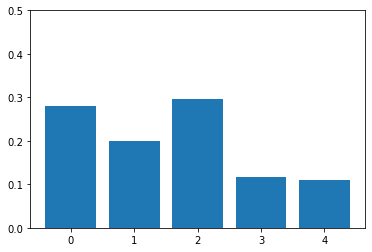

In [78]:
#pyplot.hist(x, bins, alpha=0.5, label='x')
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
fig = plt.bar(np.arange(len(lda_log.columns)),doc_topics['"Cytl1"'])
plt.ylim((0,0.5))


KeyError: '"Acsm4"'

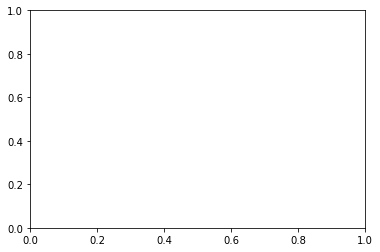

In [80]:
fig, ax = plt.subplots()
width = 0.3
x = np.arange(len(lda_raw.columns))
rects1 = ax.bar(x + width/2, doc_topics['"Acsm4"'], width,
                label='Acsm4')
rects2 = ax.bar(x - width/2, doc_topics['"Nqo1"'], width,
                label='Nqo1')
rects3 = ax.bar(x + 3/2* width, doc_topics['"Ncam2"'], width,
                label='Ncam2')


ax.legend()
plt.ylim((0,0.4))
#autolabel(rects1, "left")
#autolabel(rects2, "right")

labels = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']
ax.set_ylabel('mean gene expression over p_coord_topic')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=7)
fig.tight_layout()

plt.show()

fig.savefig("hsbm_NewDataset/LDA/Countclust_rawcounts/tmax/DEGS_topic_distr_scaled.png")

In [14]:
pd.DataFrame.from_dict(doc_topics).T.to_csv("hsbm_NewDataset/LDA/Countclust_logcounts/last2.csv")

In [195]:
c.to_csv("hsbm_NewDataset/LDA/Countclust_logcounts/notOR_memberships.csv")

In [193]:
#infer the 5 groups of genes with most similar degree of belonging to zones
#kmeans = KMeans(n_clusters=6, random_state=0).fit(c)
top = np.argmax(e.to_numpy(),axis = 1) + 1

In [192]:
#look at Moambaerts gene memberships
topics_gene_5 = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/Countclust_topic-dist.csv",index_col = [0], sep = "\t")
topics_gene_11 = pd.read_csv("hsbm_NewDataset/LDA/Countclust_rawcounts/tmax/Countclust_topic-dist.csv",index_col = [0], sep = "\t")

topics_gene_5

,1,2,3,4,5
Olfr1,0.245943,0.112417,0.419738,0.169682,0.052220
Olfr1000,0.875407,0.009066,0.078331,0.036968,0.000228
Olfr1006,0.797103,0.078693,0.000035,0.124149,0.000020
Olfr1009,0.292787,0.582271,0.020703,0.104156,0.000084
Olfr101,0.770801,0.157605,0.010555,0.060977,0.000062
...,...,...,...,...,...
Olfr987,0.452381,0.370165,0.000059,0.177345,0.000050
Olfr988,0.462770,0.430133,0.008501,0.098419,0.000177
Olfr99,0.790650,0.041689,0.038105,0.129336,0.000219
Olfr992,0.581964,0.272856,0.053737,0.087583,0.003860


In [90]:
#crossing genes in Mombaerts article
cross_genes = ["Olfr24","Olfr371","Olfr429","Olfr821","Olfr849","Olfr1104", "Olfr1338"]
topics_gene_5.loc[cross_genes,]

,1,2,3,4,5
Olfr24,0.312937,0.346875,0.140611,0.182296,0.017281
Olfr371,NaN,NaN,NaN,NaN,NaN
Olfr429,0.703971,0.082809,0.046651,0.163638,0.002931
Olfr821,0.811850,0.153439,0.007350,0.027219,0.000141
Olfr849,0.674279,0.134433,0.191178,0.000078,0.000032
Olfr1104,0.694148,0.224197,0.035302,0.046171,0.000182
Olfr1338,NaN,NaN,NaN,NaN,NaN


In [91]:
topics_gene_11.loc[cross_genes,]

,1,2,3,4,5,6,7,8,9,10,11
Olfr24,0.175889,0.229629,0.279439,0.191368,0.064585,0.018268,0.000005,0.000003,0.029815,0.000002,0.010997
Olfr371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Olfr429,0.536852,0.005375,0.208479,0.164006,0.031893,0.015200,0.017876,0.000334,0.017391,0.000006,0.002588
Olfr821,0.575167,0.021305,0.305880,0.018410,0.052505,0.005769,0.020856,0.000006,0.000087,0.000009,0.000007
Olfr849,0.454286,0.000091,0.216250,0.004096,0.251453,0.065023,0.008618,0.000013,0.000045,0.000009,0.000116
Olfr1104,0.474543,0.058861,0.320011,0.023223,0.089143,0.000714,0.026088,0.000009,0.007355,0.000049,0.000005
Olfr1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
OR = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/no_pseudogenes/Countclust_topic-dist_nops.csv", index_col = [0], sep = "\t")
OR

,1,2,3,4,5
Olfr1000,0.872607,0.008403,0.078319,0.040467,0.000205
Olfr1006,0.791359,0.079468,0.000035,0.129118,0.000020
Olfr1009,0.297560,0.582987,0.020002,0.099369,0.000083
Olfr101,0.770294,0.156049,0.010318,0.063277,0.000062
Olfr1012,0.850018,0.065371,0.000139,0.081251,0.003221
...,...,...,...,...,...
Olfr987,0.448885,0.373224,0.000058,0.177781,0.000052
Olfr988,0.465021,0.430309,0.008188,0.096302,0.000180
Olfr99,0.784216,0.042839,0.037576,0.135144,0.000224
Olfr992,0.583333,0.272174,0.052438,0.088240,0.003815


In [23]:
a = np.where(notOR["KMeans_cluster"] == 0)

with open("hsbm_NewDataset/LDA/Countclust_logcounts/DEGS_notOR_zone6_Kmean.txt","w") as f:
    for i in notOR.index[a]:
        f.writelines("\n%s" %(i))

## Try gensim method 'infer'

In [8]:
from gensim.models import ldamodel
from gensim import matutils

In [26]:
list(df.T)

['0610009B22Rik',
 '0610010F05Rik',
 '0610010K14Rik',
 '0610012G03Rik',
 '0610030E20Rik',
 '1110002L01Rik',
 '1110004F10Rik',
 '1110006O24Rik',
 '1110008P14Rik',
 '1110012L19Rik',
 '1110017D15Rik',
 '1110018N20Rik',
 '1110019D14Rik',
 '1110032A03Rik',
 '1110038F14Rik',
 '1110051M20Rik',
 '1110059E24Rik',
 '1300002E11Rik',
 '1300017J02Rik',
 '1500002C15Rik',
 '1500004A13Rik',
 '1500015A07Rik',
 '1600012H06Rik',
 '1600014C10Rik',
 '1600023N17Rik',
 '1700001L19Rik',
 '1700001O22Rik',
 '1700003E16Rik',
 '1700007K13Rik',
 '1700008J07Rik',
 '1700012B09Rik',
 '1700012D14Rik',
 '1700016K19Rik',
 '1700017B05Rik',
 '1700017M07Rik',
 '1700021F05Rik',
 '1700022I11Rik',
 '1700024G13Rik',
 '1700025G04Rik',
 '1700028E10Rik',
 '1700028P14Rik',
 '1700029J07Rik',
 '1700030J22Rik',
 '1700030K09Rik',
 '1700037C18Rik',
 '1700037H04Rik',
 '1700040D17Rik',
 '1700057H21Rik',
 '1700067K01Rik',
 '1700086L19Rik',
 '1700086O06Rik',
 '1700088E04Rik',
 '1700094D03Rik',
 '1700096K18Rik',
 '1700120C14Rik',
 '1700123O

In [11]:
CHUNKSIZE = 2000
count = 0
dob = {}
gene_names = []


reader = pd.read_csv("Myra_dataset/3Ddataset/3Ddataset/3Ddataset_allDEGs_correctednorm_2.zip",index_col = [0],chunksize=CHUNKSIZE) # nrows = 1000
     #pool = mp.Pool(3)
print('chunks loaded')
     #print(len(df['gene']))

for df in reader:
    print('chunk',count)
    count += 1
    chunk = df.T
    
    gamma = np.random.gamma(100., 1. / 100., (len(list(chunk)), 8))
    Elogtheta = matutils.dirichlet_expectation(gamma)
    expElogtheta = np.exp(Elogtheta)
    Elogbeta = matutils.dirichlet_expectation(np.random.gamma(100., 1. / 100., (8,len(chunk))))
    expElogbeta = lda_log.T.to_numpy()#np.exp(Elogbeta)
    sstats = None
    converged = 0
    
    
    for d, doc in enumerate(list(chunk)):
        print(doc,d)
        gene_names.append(doc)
        #if doc and not isinstance(doc[0][0], six.integer_types):
                # make sure the term IDs are ints, otherwise numpy will get upset
        #    ids = [int(id) for id, _ in doc]
        #else:
        #    ids = [id for id, _ in doc]
        cts = df.T[doc].values # = counts
        ids = np.arange(len(chunk))
        #doc = [int(i) for i in list(doc)]
        #cts = numpy.array([cnt for _, cnt in doc])
        gammad = gamma[d, :]
        Elogthetad = Elogtheta[d, :]
        expElogthetad = expElogtheta[d, :]
        expElogbetad =  expElogbeta[:, ids]

            # The optimal phi_{dwk} is proportional to expElogthetad_k * expElogbetad_w.
            # phinorm is the normalizer.
            # TODO treat zeros explicitly, instead of adding 1e-100?
        phinorm = np.dot(expElogthetad, expElogbetad) + 1e-100
        
        for _ in range(10000):
            lastgamma = gammad
                # We represent phi implicitly to save memory and time.
                # Substituting the value of the optimal phi back into
                # the update for gamma gives this update. Cf. Lee&Seung 2001.
            gammad = 50/8 + expElogthetad * np.dot(cts / phinorm, expElogbetad.T)
            Elogthetad = matutils.dirichlet_expectation(gammad)
            expElogthetad = np.exp(Elogthetad)
            phinorm = np.dot(expElogthetad, expElogbetad) + 1e-100
                # If gamma hasn't changed much, we're done.
            meanchange = np.mean(abs(gammad - lastgamma))
            if (meanchange < 0.01):
                converged += 1
                break
                
        gamma[d, :] = gammad
    
    dob[count] = np.exp(matutils.dirichlet_expectation(gamma))        
                
#print("it took ", time.time()-start, "seconds")            

#chunk = gene.T

chunks loaded
chunk 0
0610009B22Rik 0
0610010F05Rik 1
0610010K14Rik 2
0610012G03Rik 3
0610030E20Rik 4
1110002L01Rik 5
1110004F10Rik 6
1110006O24Rik 7
1110008P14Rik 8
1110012L19Rik 9
1110017D15Rik 10
1110018N20Rik 11
1110019D14Rik 12
1110032A03Rik 13
1110038F14Rik 14
1110051M20Rik 15
1110059E24Rik 16
1300002E11Rik 17
1300017J02Rik 18
1500002C15Rik 19
1500004A13Rik 20
1500015A07Rik 21
1600012H06Rik 22
1600014C10Rik 23
1600023N17Rik 24
1700001L19Rik 25
1700001O22Rik 26
1700003E16Rik 27
1700007K13Rik 28
1700008J07Rik 29
1700012B09Rik 30
1700012D14Rik 31
1700016K19Rik 32
1700017B05Rik 33
1700017M07Rik 34
1700021F05Rik 35
1700022I11Rik 36
1700024G13Rik 37
1700025G04Rik 38
1700028E10Rik 39
1700028P14Rik 40
1700029J07Rik 41
1700030J22Rik 42
1700030K09Rik 43
1700037C18Rik 44
1700037H04Rik 45
1700040D17Rik 46
1700057H21Rik 47
1700067K01Rik 48
1700086L19Rik 49
1700086O06Rik 50
1700088E04Rik 51
1700094D03Rik 52
1700096K18Rik 53
1700120C14Rik 54
1700123O20Rik 55
1810009A15Rik 56
1810013L24Rik 57
18

Anapc5 617
Anapc7 618
Angel1 619
Angel2 620
Angpt1 621
Angptl2 622
Angptl4 623
Angptl6 624
Ank 625
Ank2 626
Ankfy1 627
Ankib1 628
Ankle2 629
Ankmy2 630
Ankra2 631
Ankrd10 632
Ankrd11 633
Ankrd12 634
Ankrd13a 635
Ankrd13b 636
Ankrd13c 637
Ankrd26 638
Ankrd27 639
Ankrd33b 640
Ankrd37 641
Ankrd39 642
Ankrd40 643
Ankrd42 644
Ankrd45 645
Ankrd46 646
Ankrd49 647
Ankrd50 648
Ankrd54 649
Ankrd65 650
Ankrd66 651
Ankrd9 652
Anks1 653
Anks1b 654
Anks3 655
Anks4b 656
Anks6 657
Ankzf1 658
Anln 659
Ano1 660
Ano10 661
Ano2 662
Ano6 663
Ano8 664
Anp32a 665
Anp32b 666
Anp32e 667
Anpep 668
Antxr2 669
Anxa1 670
Anxa2 671
Anxa4 672
Anxa5 673
Anxa6 674
Anxa7 675
Anxa8 676
Aoc1 677
Aopep 678
Aox2 679
Ap1ar 680
Ap1b1 681
Ap1g1 682
Ap1g2 683
Ap1m1 684
Ap1m2 685
Ap1s1 686
Ap2a1 687
Ap2a2 688
Ap2b1 689
Ap2s1 690
Ap3b1 691
Ap3b2 692
Ap3d1 693
Ap3m1 694
Ap3m2 695
Ap3s2 696
Ap4b1 697
Ap4e1 698
Ap4m1 699
Ap4s1 700
Ap5b1 701
Ap5m1 702
Ap5s1 703
Ap5z1 704
Apaf1 705
Apba1 706
Apba2 707
Apba3 708
Apbb1 709
Apbb2 710
Ap

Cacna1b 1339
Cacna1d 1340
Cacna1g 1341
Cacna1h 1342
Cacna2d1 1343
Cacnb1 1344
Cacnb2 1345
Cacnb3 1346
Cacnb4 1347
Cacng4 1348
Cactin 1349
Cacul1 1350
Cadm1 1351
Cadm2 1352
Cadm4 1353
Cadps 1354
Cadps2 1355
Calb1 1356
Calcoco1 1357
Cald1 1358
Calhm5 1359
Calm1 1360
Calm3 1361
Calr 1362
Calr4 1363
Calu 1364
Caly 1365
Camk1 1366
Camk1d 1367
Camk1g 1368
Camk2a 1369
Camk2b 1370
Camk2d 1371
Camk2n2 1372
Camkk2 1373
Camkmt 1374
Camkv 1375
Caml 1376
Camsap1 1377
Camsap2 1378
Camsap3 1379
Camta1 1380
Camta2 1381
Cand1 1382
Cand2 1383
Cant1 1384
Canx 1385
Cap1 1386
Capn1 1387
Capn10 1388
Capn15 1389
Capn2 1390
Capn6 1391
Capn7 1392
Capns1 1393
Caprin1 1394
Caprin2 1395
Capsl 1396
Capza1 1397
Capza2 1398
Capzb 1399
Car1 1400
Car11 1401
Car12 1402
Car14 1403
Car4 1404
Car5b 1405
Car6 1406
Card10 1407
Card19 1408
Carhsp1 1409
Carmil2 1410
Carmil3 1411
Carnmt1 1412
Carns1 1413
Cars2 1414
Cartpt 1415
Casc1 1416
Casc3 1417
Casc4 1418
Casd1 1419
Cask 1420
Caskin1 1421
Caskin2 1422
Casp12 1423
Casp2 142

Cope 69
Copg1 70
Copg2 71
Coprs 72
Cops2 73
Cops3 74
Cops4 75
Cops5 76
Cops7b 77
Cops8 78
Copz1 79
Coq10a 80
Coq2 81
Coq3 82
Coq4 83
Coq5 84
Coq6 85
Coq8a 86
Coq9 87
Coro1a 88
Coro1b 89
Coro2a 90
Coro6 91
Cox10 92
Cox14 93
Cox15 94
Cox17 95
Cox18 96
Cox19 97
Cox20 98
Cox4i1 99
Cox5a 100
Cox5b 101
Cox6a1 102
Cox6b1 103
Cox7a1 104
Cox7a2 105
Cox7a2l 106
Cox7b 107
Cox8a 108
Cox8b 109
Cp 110
Cpd 111
Cpe 112
Cpeb1 113
Cpeb2 114
Cpeb3 115
Cpeb4 116
Cped1 117
Cplane2 118
Cplx1 119
Cplx2 120
Cpm 121
Cpn1 122
Cpne3 123
Cpox 124
Cpped1 125
Cpq 126
Cpsf1 127
Cpsf2 128
Cpsf3 129
Cpsf4 130
Cpsf4l 131
Cpsf6 132
Cpsf7 133
Cpt1a 134
Cpt1c 135
Cptp 136
Cpxm1 137
Cpxm2 138
Cr1l 139
Crabp1 140
Crabp2 141
Cracr2b 142
Crat 143
Crb3 144
Crbn 145
Crcp 146
Creb1 147
Creb3 148
Creb3l2 149
Creb3l4 150
Crebbp 151
Crebl2 152
Crebrf 153
Crebzf 154
Creg1 155
Creld1 156
Crim1 157
Crip1 158
Crip2 159
Cript 160
Crisp1 161
Crispld2 162
Crk 163
Crkl 164
Crlf1 165
Crlf3 166
Crls1 167
Crmp1 168
Crocc 169
Crot 170
Crppa 17

Eef1e1 854
Eef1g 855
Eef2 856
Eef2k 857
Eef2kmt 858
Eefsec 859
Eepd1 860
Efcab1 861
Efcab10 862
Efcab11 863
Efcab12 864
Efcab14 865
Efcab2 866
Efcab6 867
Efemp2 868
Efhc1 869
Efhc2 870
Efhd2 871
Efl1 872
Efna2 873
Efna3 874
Efna5 875
Efnb1 876
Efnb2 877
Efnb3 878
Efr3a 879
Efr3b 880
Efs 881
Eftud2 882
Egf 883
Egfl8 884
Egflam 885
Egfr 886
Egln1 887
Egln2 888
Egln3 889
Egr1 890
Ehd1 891
Ehd2 892
Ehd3 893
Ehd4 894
Ehf 895
Ehmt1 896
Ehmt2 897
Ei24 898
Eid2 899
Eid2b 900
Eif1 901
Eif1a 902
Eif1ad 903
Eif1ax 904
Eif1b 905
Eif2a 906
Eif2ak1 907
Eif2ak3 908
Eif2b1 909
Eif2b2 910
Eif2b3 911
Eif2b4 912
Eif2b5 913
Eif2d 914
Eif2s1 915
Eif2s3x 916
Eif3a 917
Eif3b 918
Eif3c 919
Eif3d 920
Eif3f 921
Eif3g 922
Eif3h 923
Eif3i 924
Eif3k 925
Eif3l 926
Eif3m 927
Eif4a-ps4 928
Eif4a1 929
Eif4a2 930
Eif4a3 931
Eif4b 932
Eif4e 933
Eif4e2 934
Eif4e3 935
Eif4ebp1 936
Eif4ebp2 937
Eif4enif1 938
Eif4g1 939
Eif4g2 940
Eif4g3 941
Eif4h 942
Eif5a 943
Eif5a2 944
Eipr1 945
Elac1 946
Elac2 947
Elane 948
Elavl1 949
E

Gabarapl2 1594
Gabbr1 1595
Gabbr2 1596
Gabpa 1597
Gabpb1 1598
Gabpb2 1599
Gabra1 1600
Gabra4 1601
Gabrb3 1602
Gabrp 1603
Gabrr1 1604
Gad1 1605
Gad2 1606
Gadd45a 1607
Gadd45g 1608
Gadd45gip1 1609
Gadl1 1610
Gak 1611
Gal3st1 1612
Gal3st2 1613
Gal3st2b 1614
Gal3st2c 1615
Galc 1616
Galm 1617
Galnt1 1618
Galnt10 1619
Galnt11 1620
Galnt13 1621
Galnt14 1622
Galnt15 1623
Galnt16 1624
Galnt17 1625
Galnt18 1626
Galnt5 1627
Galnt7 1628
Galntl6 1629
Galr2 1630
Galt 1631
Gamt 1632
Gan 1633
Ganab 1634
Ganc 1635
Gap43 1636
Gapvd1 1637
Gars 1638
Gart 1639
Gas1 1640
Gas2 1641
Gas2l1 1642
Gas2l2 1643
Gas2l3 1644
Gas5 1645
Gas6 1646
Gas7 1647
Gas8 1648
Gask1a 1649
Gask1b 1650
Gata1 1651
Gata2 1652
Gata6 1653
Gatad1 1654
Gatad2a 1655
Gatad2b 1656
Gatc 1657
Gatd1 1658
Gatd3a 1659
Gatm 1660
Gba 1661
Gba2 1662
Gbe1 1663
Gbf1 1664
Gbgt1 1665
Gbp3 1666
Gca 1667
Gcat 1668
Gcc1 1669
Gcc2 1670
Gcdh 1671
Gch1 1672
Gck 1673
Gcn1 1674
Gcnt1 1675
Gcnt2 1676
Gcnt3 1677
Gcnt7 1678
Gcsh 1679
Gda 1680
Gdap1 1681
Gdap1l1 

Grhl1 313
Grhl2 314
Grhpr 315
Gria1 316
Gria2 317
Gria3 318
Grik3 319
Grik5 320
Grip1 321
Gripap1 322
Grn 323
Grpel1 324
Grpel2 325
Grsf1 326
Grtp1 327
Grwd1 328
Gsap 329
Gsdmd 330
Gse1 331
Gsk3a 332
Gsk3b 333
Gskip 334
Gsn 335
Gspt1 336
Gsr 337
Gss 338
Gsta2 339
Gsta4 340
Gstk1 341
Gstm2 342
Gstm2-ps1 343
Gstm4 344
Gstm5 345
Gstm6 346
Gstm7 347
Gsto1 348
Gsto2 349
Gstt1 350
Gstt2 351
Gstt3 352
Gt(ROSA)26Sor 353
Gtf2a1 354
Gtf2a2 355
Gtf2e1 356
Gtf2e2 357
Gtf2f1 358
Gtf2f2 359
Gtf2h3 360
Gtf2h4 361
Gtf2h5 362
Gtf2i 363
Gtf2ird1 364
Gtf2ird2 365
Gtf3a 366
Gtf3c2 367
Gtf3c3 368
Gtf3c4 369
Gtf3c5 370
Gtf3c6 371
Gtpbp1 372
Gtpbp10 373
Gtpbp3 374
Gtpbp4 375
Gtpbp8 376
Gtse1 377
Gtsf1l 378
Gucd1 379
Gucy1b2 380
Gucy2d 381
Guf1 382
Guk1 383
Gusb 384
Gxylt1 385
Gxylt2 386
Gyg 387
Gypc 388
Gys1 389
Gzf1 390
Gzmm 391
H13 392
H1f0 393
H1f10 394
H1f2 395
H1f3 396
H1f4 397
H2-Aa 398
H2-Ab1 399
H2-D1 400
H2-DMa 401
H2-DMb2 402
H2-Eb1 403
H2-K1 404
H2-Ke6 405
H2-M3 406
H2-Q1 407
H2-Q10 408
H2-Q4 409


Klhdc1 1110
Klhdc10 1111
Klhdc2 1112
Klhdc3 1113
Klhdc4 1114
Klhdc7a 1115
Klhdc8a 1116
Klhdc8b 1117
Klhdc9 1118
Klhl12 1119
Klhl13 1120
Klhl14 1121
Klhl15 1122
Klhl18 1123
Klhl2 1124
Klhl20 1125
Klhl21 1126
Klhl23 1127
Klhl24 1128
Klhl25 1129
Klhl26 1130
Klhl28 1131
Klhl29 1132
Klhl32 1133
Klhl36 1134
Klhl42 1135
Klhl5 1136
Klhl7 1137
Klhl8 1138
Klhl9 1139
Klk1 1140
Klk14 1141
Kmt2a 1142
Kmt2c 1143
Kmt2d 1144
Kmt2e 1145
Kmt5a 1146
Kmt5b 1147
Kmt5c 1148
Knl1 1149
Knop1 1150
Kpna1 1151
Kpna2 1152
Kpna3 1153
Kpna4 1154
Kpna6 1155
Kpnb1 1156
Kptn 1157
Kras 1158
Krba1 1159
Krcc1 1160
Kremen1 1161
Krr1 1162
Krt10 1163
Krt14 1164
Krt15 1165
Krt18 1166
Krt19 1167
Krt23 1168
Krt26 1169
Krt5 1170
Krt7 1171
Krt72 1172
Krt8-ps 1173
Krt90 1174
Krtcap2 1175
Krtcap3 1176
Ksr2 1177
Kti12 1178
Ktn1 1179
Kxd1 1180
Kyat3 1181
L1cam 1182
L2hgdh 1183
L3mbtl2 1184
Lacc1 1185
Lactb2 1186
Lad1 1187
Lage3 1188
Lama2 1189
Lama4 1190
Lamb1 1191
Lamc1 1192
Lamc2 1193
Lamp1 1194
Lamtor1 1195
Lamtor2 1196
Lamtor3 1

Mmp25 1840
Mmp8 1841
Mmrn1 1842
Mms19 1843
Mmut 1844
Mn1 1845
Mns1 1846
Mob1a 1847
Mob1b 1848
Mob2 1849
Mob3a 1850
Mob3b 1851
Mob3c 1852
Mob4 1853
Mobp 1854
Mocos 1855
Mocs1 1856
Mocs3 1857
Mogat1 1858
Mogat2 1859
Mogs 1860
Mon1a 1861
Mon1b 1862
Morc2a 1863
Morc3 1864
Morf4l1 1865
Morf4l2 1866
Morn1 1867
Morn2 1868
Morn3 1869
Morn4 1870
Morn5 1871
Mosmo 1872
Mospd1 1873
Mospd2 1874
Mospd3 1875
Mov10 1876
Moxd1 1877
Moxd2 1878
Mpc1 1879
Mpc1-ps 1880
Mpc2 1881
Mpdu1 1882
Mpeg1 1883
Mphosph10 1884
Mphosph6 1885
Mphosph8 1886
Mpig6b 1887
Mpl 1888
Mpnd 1889
Mpp1 1890
Mpp2 1891
Mpp3 1892
Mpp5 1893
Mpp6 1894
Mpp7 1895
Mpped2 1896
Mprip 1897
Mpv17 1898
Mpv17l 1899
Mpv17l2 1900
Mpz 1901
Mpzl1 1902
Mpzl2 1903
Mpzl3 1904
Mr1 1905
Mras 1906
Mrc1 1907
Mrc2 1908
Mre11a 1909
Mreg 1910
Mrm1 1911
Mrm2 1912
Mrm3 1913
Mrnip 1914
Mroh2a 1915
Mrpl10 1916
Mrpl11 1917
Mrpl13 1918
Mrpl15 1919
Mrpl16 1920
Mrpl17 1921
Mrpl19 1922
Mrpl2 1923
Mrpl20 1924
Mrpl21 1925
Mrpl23 1926
Mrpl24 1927
Mrpl27 1928
Mrpl28 1929

Olfr1057 641
Olfr1065 642
Olfr1079 643
Olfr1080 644
Olfr1082 645
Olfr1085 646
Olfr1087 647
Olfr109 648
Olfr1090 649
Olfr1093 650
Olfr1097 651
Olfr11 652
Olfr110 653
Olfr1101 654
Olfr1102 655
Olfr1104 656
Olfr1107 657
Olfr1110 658
Olfr1111 659
Olfr1112 660
Olfr1115 661
Olfr1118 662
Olfr112 663
Olfr1122 664
Olfr1124 665
Olfr1137 666
Olfr1148 667
Olfr1157 668
Olfr116 669
Olfr117 670
Olfr1170 671
Olfr1177-ps 672
Olfr1178 673
Olfr1179 674
Olfr1180 675
Olfr1181 676
Olfr1183 677
Olfr1186 678
Olfr1189 679
Olfr1191-ps1 680
Olfr1192-ps1 681
Olfr1193 682
Olfr1195 683
Olfr1196 684
Olfr1198 685
Olfr1199 686
Olfr12 687
Olfr1200 688
Olfr1201 689
Olfr1202 690
Olfr1204 691
Olfr1206 692
Olfr1208 693
Olfr1209 694
Olfr1212 695
Olfr1213 696
Olfr1214 697
Olfr1216 698
Olfr1217 699
Olfr1219 700
Olfr1220 701
Olfr1222 702
Olfr1224-ps1 703
Olfr1225 704
Olfr1226 705
Olfr1229 706
Olfr123 707
Olfr1231 708
Olfr1232 709
Olfr1233 710
Olfr1234 711
Olfr1238 712
Olfr1239 713
Olfr124 714
Olfr1240 715
Olfr1242 716
Olfr1243

Paxip1 1304
Paxx 1305
Pbdc1 1306
Pbrm1 1307
Pbx3 1308
Pbx4 1309
Pcbd2 1310
Pcbp1 1311
Pcbp3 1312
Pcbp4 1313
Pcca 1314
Pccb 1315
Pcdh1 1316
Pcdh10 1317
Pcdh11x 1318
Pcdh17 1319
Pcdh18 1320
Pcdh19 1321
Pcdh7 1322
Pcdh8 1323
Pcdh9 1324
Pcdha11 1325
Pcdha12 1326
Pcdha2 1327
Pcdha3 1328
Pcdha7 1329
Pcdha9 1330
Pcdhac1 1331
Pcdhac2 1332
Pcdhb1 1333
Pcdhb11 1334
Pcdhb12 1335
Pcdhb14 1336
Pcdhb16 1337
Pcdhb17 1338
Pcdhb19 1339
Pcdhb20 1340
Pcdhb4 1341
Pcdhb7 1342
Pcdhb9 1343
Pcdhga3 1344
Pcdhga4 1345
Pcdhga5 1346
Pcdhga6 1347
Pcdhga7 1348
Pcdhgb1 1349
Pcdhgb2 1350
Pcdhgb4 1351
Pcdhgb6 1352
Pcdhgb7 1353
Pcdhgc3 1354
Pced1a 1355
Pcf11 1356
Pcgf1 1357
Pcgf3 1358
Pcgf5 1359
Pcgf6 1360
Pcid2 1361
Pcif1 1362
Pck2 1363
Pclaf 1364
Pclo 1365
Pcmt1 1366
Pcmtd1 1367
Pcmtd2 1368
Pcna 1369
Pcnp 1370
Pcnt 1371
Pcnx 1372
Pcnx2 1373
Pcnx3 1374
Pcnx4 1375
Pcolce 1376
Pcolce2 1377
Pcp4 1378
Pcp4l1 1379
Pcsk1n 1380
Pcsk2 1381
Pcsk5 1382
Pcsk6 1383
Pcsk7 1384
Pcx 1385
Pcyox1 1386
Pcyox1l 1387
Pcyt1a 1388
Pcyt1b 1

Prxl2c 26
Psapl1 27
Psat1 28
Psd 29
Psd2 30
Psd3 31
Psd4 32
Psen1 33
Psen2 34
Psenen 35
Pskh1 36
Psma1 37
Psma2 38
Psma4 39
Psma5 40
Psma6 41
Psma7 42
Psmb1 43
Psmb10 44
Psmb2 45
Psmb3 46
Psmb4 47
Psmb5 48
Psmb7 49
Psmc2 50
Psmc4 51
Psmc5 52
Psmc6 53
Psmd1 54
Psmd10 55
Psmd11 56
Psmd2 57
Psmd3 58
Psmd4 59
Psmd5 60
Psmd6 61
Psmd7 62
Psmd8 63
Psmd9 64
Psme1 65
Psme2 66
Psme3 67
Psme4 68
Psmf1 69
Psmg1 70
Psmg2 71
Psmg3 72
Pspc1 73
Psph 74
Pstpip2 75
Ptbp1 76
Ptbp2 77
Ptbp3 78
Ptcd1 79
Ptcd2 80
Ptcd3 81
Ptchd1 82
Ptdss1 83
Ptdss2 84
Pten 85
Ptgds 86
Ptger2 87
Ptger3 88
Ptges 89
Ptges2 90
Ptges3-ps 91
Ptgfr 92
Ptgis 93
Ptgr2 94
Ptgs1 95
Pth1r 96
Pth2 97
Pthlh 98
Ptk2 99
Ptk2b 100
Ptk7 101
Ptma 102
Ptn 103
Ptov1 104
Ptp4a1 105
Ptp4a2 106
Ptp4a3 107
Ptpa 108
Ptpdc1 109
Ptpmt1 110
Ptpn1 111
Ptpn11 112
Ptpn13 113
Ptpn18 114
Ptpn2 115
Ptpn3 116
Ptpn4 117
Ptpn6 118
Ptpn9 119
Ptpra 120
Ptprd 121
Ptprf 122
Ptprg 123
Ptprj 124
Ptprk 125
Ptprm 126
Ptprn 127
Ptprr 128
Ptprs 129
Ptpru 130
Ptprz1 131
P

Sbspon 837
Sc5d 838
Scaf1 839
Scaf11 840
Scaf4 841
Scaf8 842
Scamp1 843
Scamp2 844
Scamp3 845
Scamp4 846
Scamp5 847
Scand1 848
Scap 849
Scaper 850
Scara3 851
Scara5 852
Scarb1 853
Scarb2 854
Scarf1 855
Scarf2 856
Sccpdh 857
Scd2 858
Scd3 859
Scfd1 860
Scfd2 861
Scg2 862
Scg3 863
Scg5 864
Scgb1b27 865
Scgb1c1 866
Scgb2b27 867
Scgb3a1 868
Scgn 869
Schip1 870
Scin 871
Scly 872
Scmh1 873
Scn1b 874
Scn3a 875
Scn3b 876
Scn4b 877
Scn5a 878
Scn7a 879
Scn8a 880
Scn9a 881
Scnm1 882
Scnn1a 883
Sco1 884
Sco2 885
Scoc 886
Scp2 887
Scpep1 888
Scrg1 889
Scrib 890
Scrn1 891
Scrn3 892
Scube3 893
Scyl1 894
Scyl2 895
Scyl3 896
Sdad1 897
Sdc1 898
Sdc2 899
Sdc3 900
Sdc4 901
Sdcbp 902
Sdcbp2 903
Sdccag8 904
Sde2 905
Sdf2 906
Sdf4 907
Sdha 908
Sdhaf1 909
Sdhaf2 910
Sdhaf3 911
Sdhaf4 912
Sdhb 913
Sdhd 914
Sdk1 915
Sdr16c5 916
Sdr39u1 917
Sdr42e1 918
Sec11a 919
Sec11c 920
Sec13 921
Sec14l1 922
Sec14l2 923
Sec14l3 924
Sec14l4 925
Sec14l5 926
Sec16a 927
Sec22a 928
Sec22b 929
Sec22c 930
Sec23a 931
Sec23b 932
Sec2

Spata13 1539
Spata2 1540
Spata2l 1541
Spata33 1542
Spata5 1543
Spata7 1544
Spats1 1545
Spats2 1546
Spcs1 1547
Spcs2 1548
Spcs3 1549
Spdl1 1550
Specc1 1551
Specc1l 1552
Spef1 1553
Spef2 1554
Speg 1555
Spen 1556
Spg11 1557
Spg20 1558
Spg21 1559
Spg7 1560
Sphk1 1561
Sphk2 1562
Sphkap 1563
Spi1 1564
Spic 1565
Spice1 1566
Spin1 1567
Spindoc 1568
Spint1 1569
Spint2 1570
Spire1 1571
Spire2 1572
Spns1 1573
Spns2 1574
Spock1 1575
Spock2 1576
Spock3 1577
Spon1 1578
Spon2 1579
Spop 1580
Spopl 1581
Spout1 1582
Sppl2b 1583
Sppl3 1584
Spr 1585
Spred1 1586
Spred2 1587
Sprr1a 1588
Sprtn 1589
Spry1 1590
Spryd3 1591
Spryd7 1592
Spsb1 1593
Spsb2 1594
Spsb3 1595
Spta1 1596
Sptan1 1597
Sptb 1598
Sptbn1 1599
Sptbn2 1600
Sptbn4 1601
Sptlc1 1602
Sptlc2 1603
Sptlc3 1604
Sptssa 1605
Spty2d1 1606
Sqle 1607
Sra1 1608
Src 1609
Srcin1 1610
Srd5a1 1611
Srd5a2 1612
Srd5a3 1613
Srebf1 1614
Srebf2 1615
Srek1 1616
Srf 1617
Srfbp1 1618
Srgap1 1619
Srgap2 1620
Sri 1621
Srp54c 1622
Srp68 1623
Srp72 1624
Srpk1 1625
Srpk2 16

Tmem40 282
Tmem41a 283
Tmem41b 284
Tmem43 285
Tmem44 286
Tmem47 287
Tmem50a 288
Tmem50b 289
Tmem51 290
Tmem53 291
Tmem56 292
Tmem59 293
Tmem59l 294
Tmem60 295
Tmem62 296
Tmem63a 297
Tmem63b 298
Tmem64 299
Tmem65 300
Tmem67 301
Tmem68 302
Tmem69 303
Tmem70 304
Tmem74b 305
Tmem74bos 306
Tmem79 307
Tmem8 308
Tmem80 309
Tmem86a 310
Tmem87a 311
Tmem87b 312
Tmem9 313
Tmem94 314
Tmem97 315
Tmem98 316
Tmem9b 317
Tmf1 318
Tmigd1 319
Tmod1 320
Tmod2 321
Tmod3 322
Tmpo 323
Tmprss11b 324
Tmprss5 325
Tmprss6 326
Tmsb15b1 327
Tmsb4x 328
Tmtc1 329
Tmtc2 330
Tmtc3 331
Tmtc4 332
Tmub1 333
Tmub2 334
Tmx2 335
Tmx3 336
Tmx4 337
Tnc 338
Tnfaip1 339
Tnfaip2 340
Tnfaip8 341
Tnfrsf11a 342
Tnfrsf11b 343
Tnfrsf12a 344
Tnfrsf13b 345
Tnfrsf13c 346
Tnfrsf19 347
Tnfrsf1a 348
Tnfrsf21 349
Tnfsf10 350
Tnfsf13 351
Tnfsfm13 352
Tnik 353
Tnip1 354
Tnk2 355
Tnks 356
Tnks1bp1 357
Tnks2 358
Tnmd 359
Tnn 360
Tnnt1 361
Tnpo2 362
Tnpo3 363
Tnrc18 364
Tnrc6a 365
Tnrc6b 366
Tnrc6c 367
Tns1 368
Tns2 369
Tns3 370
Tns4 371
Tob1 37

Wdr91 1072
Wdr92 1073
Wdr93 1074
Wdr95 1075
Wdsub1 1076
Wdtc1 1077
Wdyhv1 1078
Wee1 1079
Wee2 1080
Wfdc1 1081
Wfdc12 1082
Wfdc17 1083
Wfdc2 1084
Wfdc21 1085
Wfdc3 1086
Wfs1 1087
Whamm 1088
Whrn 1089
Wif1 1090
Wipi2 1091
Wiz 1092
Wnk1 1093
Wnk2 1094
Wnk4 1095
Wnt4 1096
Wnt6 1097
Wnt7b 1098
Wrap53 1099
Wrap73 1100
Wrb 1101
Wrnip1 1102
Wsb1 1103
Wsb2 1104
Wscd1 1105
Wtap 1106
Wtip 1107
Wwc1 1108
Wwc2 1109
Wwox 1110
Wwp2 1111
Wwtr1 1112
Xab2 1113
Xdh 1114
Xiap 1115
Xk 1116
Xkr4 1117
Xkr8 1118
Xlr3a 1119
Xndc1 1120
Xpa 1121
Xpc 1122
Xpnpep1 1123
Xpnpep3 1124
Xpo1 1125
Xpo4 1126
Xpo5 1127
Xpo6 1128
Xpo7 1129
Xpot 1130
Xpr1 1131
Xrcc1 1132
Xrcc4 1133
Xrcc5 1134
Xrcc6 1135
Xrn2 1136
Xxylt1 1137
Xylb 1138
Xylt1 1139
Xylt2 1140
Yaf2 1141
Yap1 1142
Yars 1143
Ybey 1144
Ybx1 1145
Ybx3 1146
Yeats2 1147
Yeats4 1148
Yes1 1149
Yif1a 1150
Yif1b 1151
Yipf1 1152
Yipf2 1153
Yipf3 1154
Yipf4 1155
Yipf5 1156
Yipf6 1157
Yjefn3 1158
Yju2 1159
Ykt6 1160
Ylpm1 1161
Yme1l1 1162
Ypel1 1163
Ypel3 1164
Ypel4 1165
Yr

In [12]:
dob

{1: array([[0.14796343, 0.1918197 , 0.12965018, ..., 0.13151595, 0.01015031,
         0.00306336],
        [0.13660596, 0.189679  , 0.12912163, ..., 0.12510585, 0.01215876,
         0.00386622],
        [0.13229554, 0.2114548 , 0.07627427, ..., 0.15435692, 0.00664751,
         0.00307894],
        ...,
        [0.14255528, 0.18437971, 0.13902468, ..., 0.1240785 , 0.01211672,
         0.00394757],
        [0.13148225, 0.18992879, 0.12442898, ..., 0.11817663, 0.01591991,
         0.00403404],
        [0.12760057, 0.21063265, 0.1288608 , ..., 0.12189407, 0.01564392,
         0.00507852]]),
 2: array([[0.15341476, 0.18968668, 0.1252943 , ..., 0.12639871, 0.01019519,
         0.00195196],
        [0.14997921, 0.17522034, 0.16079814, ..., 0.12765158, 0.01039367,
         0.00428755],
        [0.1352671 , 0.18813383, 0.12892663, ..., 0.13012169, 0.01243288,
         0.0050311 ],
        ...,
        [0.15104302, 0.23810855, 0.02090792, ..., 0.12784957, 0.00301404,
         0.00131929],
      

In [13]:
dob_copy = dob

In [56]:
for i in list(dob):
    for r in range(len(dob[i])):
        dob[i][r] = dob[i][r]/np.sum(dob[i], axis = 1)[r]


In [16]:
b = pd.concat([ pd.DataFrame(dob[1]), pd.DataFrame(dob[2]), pd.DataFrame(dob[3]), pd.DataFrame(dob[4]), pd.DataFrame(dob[5]), pd.DataFrame(dob[6])])


In [53]:
a = pd.concat([ pd.DataFrame(dob[1]), pd.DataFrame(dob[2]), pd.DataFrame(dob[3]), pd.DataFrame(dob[4]), pd.DataFrame(dob[5])])

In [67]:
c = pd.concat([b.T,a.T])

In [291]:
gamma = np.random.gamma(100., 1. / 100., (len(list(chunk)), 5))
Elogtheta = matutils.dirichlet_expectation(gamma)
expElogtheta = np.exp(Elogtheta)
Elogbeta = matutils.dirichlet_expectation(np.random.gamma(100., 1. / 100., (5,len(chunk))))
expElogbeta = lda_log.T.to_numpy()#np.exp(Elogbeta)
sstats = None
converged = 0

In [292]:
for d, doc in enumerate(list(chunk)):
        print(doc,d)
        #if doc and not isinstance(doc[0][0], six.integer_types):
                # make sure the term IDs are ints, otherwise numpy will get upset
        #    ids = [int(id) for id, _ in doc]
        #else:
        #    ids = [id for id, _ in doc]
        cts = chunk[doc].values # = counts
        ids = np.arange(len(chunk))
        #doc = [int(i) for i in list(doc)]
        #cts = numpy.array([cnt for _, cnt in doc])
        gammad = gamma[d, :]
        Elogthetad = Elogtheta[d, :]
        expElogthetad = expElogtheta[d, :]
        expElogbetad =  expElogbeta[:, ids]

            # The optimal phi_{dwk} is proportional to expElogthetad_k * expElogbetad_w.
            # phinorm is the normalizer.
            # TODO treat zeros explicitly, instead of adding 1e-100?
        phinorm = np.dot(expElogthetad, expElogbetad) + 1e-100
        
        for _ in range(10000):
            lastgamma = gammad
                # We represent phi implicitly to save memory and time.
                # Substituting the value of the optimal phi back into
                # the update for gamma gives this update. Cf. Lee&Seung 2001.
            gammad = 0.01 + expElogthetad * np.dot(cts / phinorm, expElogbetad.T)
            Elogthetad = matutils.dirichlet_expectation(gammad)
            expElogthetad = np.exp(Elogthetad)
            phinorm = np.dot(expElogthetad, expElogbetad) + 1e-100
                # If gamma hasn't changed much, we're done.
            meanchange = np.mean(abs(gammad - lastgamma))
            if (meanchange < 0.01):
                converged += 1
                break
                
        gamma[d, :] = gammad

Tenm3 0
Tenm4 1
Tent2 2
Tent4a 3
Tent4b 4
Tent5a 5
Tent5b 6
Terf1 7
Terf2 8
Terf2ip 9
Tert 10
Tes 11
Tesc 12
Tesk1 13
Tet1 14
Tex10 15
Tex2 16
Tex26 17
Tex261 18
Tex264 19
Tex29 20
Tex33 21
Tex52 22
Tex9 23
Tfam 24
Tfb1m 25
Tfb2m 26
Tfcp2 27
Tfdp1 28
Tfdp2 29
Tfe3 30
Tfeb 31
Tff2 32
Tfg 33
Tfip11 34
Tfpi 35
Tfpt 36
Tfrc 37
Tgfa 38
Tgfb1 39
Tgfb1i1 40
Tgfb2 41
Tgfb3 42
Tgfbi 43
Tgfbr1 44
Tgfbr2 45
Tgfbr3 46
Tgfbrap1 47
Tgm2 48
Tgoln1 49
Tgs1 50
Tgtp1 51
Tgtp2 52
Th 53
Thada 54
Thap1 55
Thap11 56
Thap12 57
Thap2 58
Thap3 59
Thap4 60
Thap6 61
Thap7 62
Thbd 63
Thbs1 64
Thbs2 65
Thegl 66
Them4 67
Them6 68
Themis2 69
Thg1l 70
Thnsl1 71
Thnsl2 72
Thoc1 73
Thoc2 74
Thoc2l 75
Thoc3 76
Thoc5 77
Thoc6 78
Thoc7 79
Thop1 80
Thra 81
Thrap3 82
Thsd1 83
Thsd4 84
Thsd7b 85
Thtpa 86
Thumpd1 87
Thumpd3 88
Thyn1 89
Tia1 90
Tiam2 91
Ticrr 92
Tigar 93
Tigd2 94
Tigd5 95
Timd2 96
Timm10b 97
Timm13 98
Timm17a 99
Timm17b 100
Timm22 101
Timm29 102
Timm44 103
Timm50 104
Timm8b 105
Timm9 106
Timmdc1 107
Timp1 108


Ubxn7 775
Ubxn8 776
Uchl1 777
Uchl3 778
Uchl5 779
Uck1 780
Uck2 781
Uckl1 782
Uckl1os 783
Ucma 784
Ucp2 785
Uevld 786
Ufc1 787
Ufd1 788
Ufl1 789
Ufm1 790
Ufsp1 791
Ufsp2 792
Ugcg 793
Ugdh 794
Uggt1 795
Ugp2 796
Ugt1a7c 797
Ugt2a1 798
Ugt2a2 799
Ugt8a 800
Uhmk1 801
Uhrf1 802
Uhrf1bp1 803
Uhrf1bp1l 804
Uhrf2 805
Uimc1 806
Ulk1 807
Ulk2 808
Ulk3 809
Ulk4 810
Umad1 811
Umodl1 812
Umps 813
Unc119 814
Unc119b 815
Unc13a 816
Unc13b 817
Unc13c 818
Unc13d 819
Unc45a 820
Unc50 821
Unc5a 822
Unc5b 823
Unc80 824
Unc93b1 825
Uncx 826
Unk 827
Unkl 828
Uox 829
Upb1 830
Upf1 831
Upf2 832
Upf3a 833
Upk1a 834
Upk1b 835
Upk3bl 836
Upp1 837
Upp2 838
Uqcc1 839
Uqcc3 840
Uqcr10 841
Uqcr11 842
Uqcrb 843
Uqcrc1 844
Uqcrfs1 845
Uqcrh 846
Urah 847
Urb1 848
Urb2 849
Urgcp 850
Uri1 851
Urm1 852
Urod 853
Uros 854
Usb1 855
Use1 856
Usf1 857
Usf2 858
Usf3 859
Uso1 860
Usp1 861
Usp10 862
Usp12 863
Usp14 864
Usp15 865
Usp16 866
Usp19 867
Usp2 868
Usp20 869
Usp21 870
Usp22 871
Usp24 872
Usp25 873
Usp28 874
Usp3 875
Usp

Zmat2 1518
Zmat3 1519
Zmat4 1520
Zmat5 1521
Zmiz1 1522
Zmiz2 1523
Zmpste24 1524
Zmym1 1525
Zmym2 1526
Zmym3 1527
Zmym4 1528
Zmym5 1529
Zmym6 1530
Zmynd10 1531
Zmynd11 1532
Zmynd19 1533
Zmynd8 1534
Znfx1 1535
Znhit1 1536
Znhit2 1537
Znhit6 1538
Znrd1 1539
Znrd1as 1540
Znrf1 1541
Znrf2 1542
Znrf3 1543
Zpld2 1544
Zpr1 1545
Zranb1 1546
Zranb2 1547
Zrsr1 1548
Zrsr2 1549
Zscan12 1550
Zscan20 1551
Zscan21 1552
Zscan22 1553
Zscan29 1554
Zswim1 1555
Zswim3 1556
Zswim4 1557
Zswim5 1558
Zswim7 1559
Zswim8 1560
Zswim9 1561
Zup1 1562
Zw10 1563
Zwint 1564
Zyg11b 1565
Zyx 1566
Zzz3 1567


In [17]:
dob = b.T
dob.columns = gene_names
dob

,0610009B22Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,1110002L01Rik,1110004F10Rik,1110006O24Rik,1110008P14Rik,1110012L19Rik,...,Zswim7,Zswim8,Zswim9,Zup1,Zw10,Zwint,Zyg11b,Zyx,Zzz3,NaN
0,0.147963,0.136606,0.132296,0.149133,0.106224,0.148049,0.159213,0.162594,0.155258,0.151883,...,0.138639,0.129974,0.115728,0.135308,0.127217,0.153188,0.115984,0.111843,0.128226,NaN
1,0.191820,0.189679,0.211455,0.178290,0.208447,0.197347,0.186416,0.182084,0.186807,0.164107,...,0.215380,0.195080,0.188400,0.180972,0.190685,0.197729,0.203823,0.221131,0.191021,NaN
2,0.129650,0.129122,0.076274,0.128615,0.113116,0.056862,0.150062,0.052786,0.113262,0.138621,...,0.116273,0.083339,0.087168,0.114615,0.106508,0.136104,0.089009,0.146981,0.120274,NaN
3,0.252772,0.266272,0.285994,0.261590,0.304089,0.327444,0.234392,0.309446,0.261844,0.244052,...,0.250270,0.317738,0.322212,0.282728,0.292602,0.246327,0.337587,0.287144,0.289652,NaN
4,0.133024,0.137149,0.129780,0.140238,0.124925,0.123801,0.133326,0.145527,0.135617,0.154713,...,0.116687,0.130148,0.137539,0.148256,0.140723,0.127319,0.117549,0.108978,0.136319,NaN
5,0.131516,0.125106,0.154357,0.131148,0.114994,0.139858,0.124766,0.138815,0.135850,0.135218,...,0.153311,0.130051,0.128404,0.116277,0.122192,0.129225,0.115192,0.101896,0.111489,NaN
6,0.010150,0.012159,0.006648,0.007631,0.024413,0.004547,0.009256,0.007145,0.008148,0.007683,...,0.005228,0.011157,0.015784,0.018202,0.016485,0.007488,0.016879,0.018748,0.018476,NaN
7,0.003063,0.003866,0.003079,0.003312,0.003725,0.002000,0.002541,0.001496,0.003173,0.003681,...,0.004146,0.002460,0.004696,0.003583,0.003535,0.002590,0.003919,0.003239,0.004499,NaN


In [196]:
from scipy.stats import spearmanr
rho, p = spearmanr(gamma[250]/sums[250],topics_gene_5.iloc[250,:])
print(rho,p)

0.9999999999999999 1.4042654220543672e-24


In [18]:
dob = dob.T

In [297]:
dob["highest_topic"] = dob.idxmax(axis = 1).values

In [39]:
dob.to_csv("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/dob_inferred.csv")

In [33]:
dob = dob.iloc[:11565,:]
dob.shape

(11565, 8)

In [34]:
ors = []

for i in gene_names:
    print(i)
    if 'Olfr' in i:
        ors.append(i)

0610009B22Rik
0610010F05Rik
0610010K14Rik
0610012G03Rik
0610030E20Rik
1110002L01Rik
1110004F10Rik
1110006O24Rik
1110008P14Rik
1110012L19Rik
1110017D15Rik
1110018N20Rik
1110019D14Rik
1110032A03Rik
1110038F14Rik
1110051M20Rik
1110059E24Rik
1300002E11Rik
1300017J02Rik
1500002C15Rik
1500004A13Rik
1500015A07Rik
1600012H06Rik
1600014C10Rik
1600023N17Rik
1700001L19Rik
1700001O22Rik
1700003E16Rik
1700007K13Rik
1700008J07Rik
1700012B09Rik
1700012D14Rik
1700016K19Rik
1700017B05Rik
1700017M07Rik
1700021F05Rik
1700022I11Rik
1700024G13Rik
1700025G04Rik
1700028E10Rik
1700028P14Rik
1700029J07Rik
1700030J22Rik
1700030K09Rik
1700037C18Rik
1700037H04Rik
1700040D17Rik
1700057H21Rik
1700067K01Rik
1700086L19Rik
1700086O06Rik
1700088E04Rik
1700094D03Rik
1700096K18Rik
1700120C14Rik
1700123O20Rik
1810009A15Rik
1810013L24Rik
1810014B01Rik
1810019D21Rik
1810021B22Rik
1810030O07Rik
1810034E14Rik
1810044D09Rik
1810046K07Rik
1810055G02Rik
1810058I24Rik
1810062G17Rik
2010001K21Rik
2010007H06Rik
2010204K13Rik
201030

Fam117a
Fam117b
Fam118a
Fam118b
Fam120a
Fam120b
Fam120c
Fam122a
Fam126a
Fam126b
Fam129a
Fam129b
Fam131a
Fam131b
Fam131c
Fam133b
Fam135a
Fam136a
Fam13a
Fam13b
Fam13c
Fam149a
Fam149b
Fam160a1
Fam160a2
Fam160b1
Fam160b2
Fam161a
Fam161b
Fam166b
Fam168a
Fam168b
Fam169b
Fam171a1
Fam171b
Fam172a
Fam173a
Fam174a
Fam174b
Fam178b
Fam180a
Fam181b
Fam184a
Fam184b
Fam185a
Fam187b
Fam189a2
Fam189b
Fam192a
Fam193a
Fam193b
Fam199x
Fam204a
Fam207a
Fam20b
Fam20c
Fam210a
Fam210b
Fam214a
Fam216a
Fam216b
Fam217a
Fam217b
Fam219b
Fam220a
Fam221a
Fam222a
Fam222b
Fam229b
Fam234a
Fam234b
Fam241a
Fam241b
Fam32a
Fam3a
Fam3c
Fam43a
Fam45a
Fam49a
Fam49b
Fam50a
Fam53a
Fam53b
Fam53c
Fam57a
Fam76a
Fam76b
Fam78a
Fam78b
Fam81a
Fam81b
Fam83f
Fam83g
Fam83h
Fam89a
Fam91a1
Fam92a
Fam92b
Fam98a
Fam98c
Fanca
Fancc
Fancf
Fancg
Fancl
Fank1
Far1
Farp1
Farp2
Fars2
Farsa
Farsb
Fasn
Fastk
Fastkd2
Fastkd3
Fastkd5
Fat4
Fau
Faxc
Fbh1
Fbl
Fblim1
Fbln1
Fbln2
Fbln7
Fbp1
Fbp2
Fbrsl1
Fbxl12
Fbxl12os
Fbxl13
Fbxl14
Fbxl15
Fbxl16
Fbxl17
Fbxl1

Nceh1
Ncf1
Ncf2
Ncf4
Nck1
Nckap1
Nckipsd
Ncl
Ncln
Ncmap
Ncoa1
Ncoa2
Ncoa3
Ncoa4
Ncoa5
Ncoa6
Ncoa7
Ncor1
Ncor2
Ncs1
Ncstn
Ndc1
Nde1
Ndel1
Ndfip2
Ndn
Ndor1
Ndp
Ndrg1
Ndrg2
Ndrg3
Ndrg4
Ndst1
Ndst2
Ndufa1
Ndufa10
Ndufa11
Ndufa12
Ndufa13
Ndufa2
Ndufa3
Ndufa5
Ndufa7
Ndufa8
Ndufab1
Ndufaf1
Ndufaf2
Ndufaf3
Ndufaf4
Ndufaf5
Ndufaf7
Ndufaf8
Ndufb10
Ndufb11
Ndufb2
Ndufb3
Ndufb4
Ndufb5
Ndufb6
Ndufb7
Ndufb8
Ndufc1
Ndufc2
Ndufs1
Ndufs2
Ndufs4
Ndufs5-ps
Ndufs6
Ndufs8
Ndufv2
Nebl
Necab1
Necab2
Necab3
Necap1
Necap2
Nectin2
Nectin3
Nectin4
Nedd1
Nedd4
Nedd8
Nedd9
Neil3
Nek1
Nek11
Nek2
Nek4
Nek5
Nek6
Nek7
Nek8
Nelfa
Nelfb
Nelfcd
Nelfe
Nell2
Nemf
Nenf
Neo1
Net1
Neto2
Neu1
Neu2
Neurl1a
Neurl4
Neurod1
Nf2
Nfasc
Nfat5
Nfatc1
Nfatc2
Nfatc3
Nfe2
Nfe2l1
Nfe2l2
Nfia
Nfib
Nfic
Nfil3
Nfix
Nfkb1
Nfkb2
Nfkbia
Nfkbib
Nfkbie
Nfkbil1
Nfkbiz
Nfrkb
Nfs1
Nfu1
Nfx1
Nfxl1
Nfya
Nfyb
Nfyc
Ngdn
Ngef
Ngly1
Ngp
Ngrn
Nhlh2
Nhlrc2
Nhlrc3
Nhlrc4
Nhsl1
Nicn1
Nid1
Nif3l1
Nifk
Nin
Ninj1
Ninl
Nip7
Nipa1
Nipa2
Nipal1
Nipal2
Nipal3
Nipbl


St3gal5
St3gal6
St5
St6gal1
St6galnac2
St6galnac4
St6galnac6
St7l
St8sia6
Stab1
Stac
Stag1
Stag2
Stam
Stam2
Stambp
Stambpl1
Stamos
Stard10
Stard13
Stard3
Stard5
Stard8
Stat1
Stat2
Stat3
Stat5b
Stat6
Stau1
Stau2
Stbd1
Stc1
Steap1
Steap2
Steap3
Steap4
Stil
Stim1
Stim2
Stimate
Stip1
Stk10
Stk11
Stk11ip
Stk16
Stk19
Stk24
Stk25
Stk26
Stk3
Stk32a
Stk32b
Stk35
Stk36
Stk38
Stk38l
Stk4
Stk40
Stmn1
Stmn2
Stmn3
Stmn4
Stmnd1
Stn1
Stom
Stoml1
Stoml2
Stoml3
Ston2
Stox1
Stox2
Stra6
Strada
Stradb
Strap
Strbp
Strip1
Strn
Strn3
Strn4
Stt3a
Stt3b
Stub1
Stx12
Stx17
Stx18
Stx1a
Stx1b
Stx2
Stx3
Stx4a
Stx5a
Stx6
Stx7
Stx8
Stxbp1
Stxbp2
Stxbp3
Stxbp4
Stxbp5
Stxbp5l
Stxbp6
Styxl1
Sucla2
Suclg1
Suclg2
Suco
Suds3
Sufu
Sugp1
Sugp2
Sugt1
Sulf1
Sulf2
Sult1a1
Sult1b1
Sult1c1
Sult1d1
Sult1e1
Sult4a1
Sumf1
Sumf2
Sumo1
Sumo3
Sun1
Suox
Supt16
Supt20
Supt4a
Supt5
Supt6
Supt7l
Supv3l1
Surf1
Surf2
Surf4
Surf6
Susd2
Susd3
Susd4
Susd5
Susd6
Suv39h1
Suv39h2
Suz12
Sv2a
Sv2b
Sv2c
Sva
Svbp
Svep1
Svil
Svip
Swap70
Swi5
Swsap1
Syap

TypeError: argument of type 'float' is not iterable

In [38]:
dob.drop(ors,inplace = True)

In [75]:
OR_inf = c.loc[ors,:]
OR = OR.loc[ors,:]

In [100]:
np.mean(OR_inf.corrwith(OR, axis = 1))

0.9956590240351609

In [18]:
dob_inferred = pd.read_csv("hsbm_NewDataset/LDA/Countclust_logcounts/no_pseudogenes/dob_inferred_nops.csv",index_col = [0])
dob_inferred = dob_inferred.loc[list(dob_inferred.index.isin(lda_log.index)),:]
dob_inferred

,0,1,2,3,4
Olfr1000,0.873308,0.007620,7.831812e-02,0.040753,5.883432e-07
Olfr1006,0.791634,0.079246,5.831483e-07,0.129119,5.831483e-07
Olfr1009,0.297932,0.582938,1.975099e-02,0.099379,5.014584e-07
Olfr1013,0.742300,0.112324,5.441658e-02,0.090959,2.861159e-07
Olfr1016,0.653237,0.134013,8.590945e-02,0.126840,4.285158e-07
...,...,...,...,...,...
Olfr983,0.829793,0.060676,4.962123e-07,0.109530,4.962123e-07
Olfr987,0.449018,0.373215,3.734861e-07,0.177766,3.734861e-07
Olfr988,0.465448,0.430246,7.979210e-03,0.096327,4.242192e-07
Olfr99,0.784370,0.042757,3.770934e-02,0.135163,2.954708e-07


In [22]:
stdv = []
for i in dob_inferred.index:
    a = dob_inferred.loc[i,:].to_numpy()
    print(a)
    b = lda_log.loc[i,:].to_numpy()
    print(b)
    diff = a - b
    SD = np.sum(np.square(diff))
    stdv.append(SD/5)
    

[8.73308499e-01 7.61953294e-03 7.83181201e-02 4.07532596e-02
 5.88343245e-07]
[8.72607410e-01 8.40252715e-03 7.83188236e-02 4.04665075e-02
 2.04731694e-04]
[7.91633847e-01 7.92461599e-02 5.83148314e-07 1.29118827e-01
 5.83148314e-07]
[7.91358971e-01 7.94681367e-02 3.47933521e-05 1.29117977e-01
 2.01216407e-05]
[2.97931637e-01 5.82937668e-01 1.97509853e-02 9.93792079e-02
 5.01458433e-07]
[2.97559584e-01 5.82987079e-01 2.00015540e-02 9.93688156e-02
 8.29673855e-05]
[7.42300174e-01 1.12323538e-01 5.44165830e-02 9.09594196e-02
 2.86115883e-07]
[7.42193316e-01 1.12337755e-01 5.43455268e-02 9.09797271e-02
 1.43674851e-04]
[6.53236904e-01 1.34013346e-01 8.59094460e-02 1.26839876e-01
 4.28515771e-07]
[6.53001328e-01 1.34098162e-01 8.59992827e-02 1.26857513e-01
 4.37153673e-05]
[0.22240858 0.13708157 0.42860768 0.09982388 0.11207829]
[0.22233432 0.13706525 0.42862973 0.09986987 0.11210083]
[2.93926858e-01 5.52369438e-01 3.98947231e-07 1.53702906e-01
 3.98947231e-07]
[2.93854519e-01 5.52355190e-

 7.44280556e-07]
[8.28958822e-01 3.04234513e-02 3.38295321e-03 1.36942692e-01
 2.92081386e-04]
[0.05873145 0.0194232  0.2777589  0.13132693 0.51275952]
[0.05848418 0.01978128 0.27782884 0.131254   0.5126517 ]
[8.25113830e-01 1.36539454e-02 4.07708546e-02 1.20460847e-01
 5.22701701e-07]
[0.83199314 0.00735828 0.0323597  0.12162307 0.00666581]
[5.73155455e-01 1.35160666e-01 2.19121480e-01 7.25621994e-02
 1.99364209e-07]
[5.73086427e-01 1.35149894e-01 2.19093900e-01 7.26064582e-02
 6.33205204e-05]
[9.97548198e-02 1.99361742e-02 2.22098466e-07 1.80515442e-01
 6.99793342e-01]
[9.94458730e-02 2.02759598e-02 1.61582090e-04 1.80409124e-01
 6.99707461e-01]
[8.46190562e-02 6.20265529e-02 2.03005626e-07 2.02962624e-01
 6.50391563e-01]
[8.43481764e-02 6.21362145e-02 4.41109175e-04 2.02862469e-01
 6.50212031e-01]
[9.79648643e-02 2.27538374e-07 2.27538374e-07 2.51689127e-01
 6.50345553e-01]
[9.43434909e-02 4.78816641e-03 7.95528909e-05 2.50800921e-01
 6.49987869e-01]
[2.84895806e-07 2.21091034e-02 1

[0.01890528 0.06251538 0.20428916 0.06067597 0.65361421]
[1.17087621e-01 1.12125211e-02 5.26389764e-01 2.64314135e-07
 3.45309830e-01]
[1.16314486e-01 1.19816726e-02 5.26657110e-01 8.97063335e-05
 3.44957025e-01]
[1.33929165e-01 1.88037283e-07 3.18239059e-01 1.31509304e-01
 4.16322284e-01]
[1.33857899e-01 3.21443722e-05 3.18273317e-01 1.31521782e-01
 4.16314857e-01]
[0.56241092 0.09060714 0.19113219 0.14203313 0.0138166 ]
[0.56250263 0.09049139 0.19070169 0.14206728 0.01423701]
[5.87310626e-01 9.94798767e-02 1.43644196e-01 1.69564615e-01
 6.87356064e-07]
[5.87031367e-01 9.96530432e-02 1.43589023e-01 1.69558072e-01
 1.68495594e-04]
[4.18204284e-01 6.35327427e-02 3.00455757e-01 2.17806678e-01
 5.38246942e-07]
[4.17896300e-01 6.37620686e-02 3.00466012e-01 2.17791024e-01
 8.45949920e-05]
[0.37581942 0.10588276 0.28764963 0.22415978 0.0064884 ]
[0.37612089 0.10563888 0.28691208 0.22421268 0.00711547]
[4.89301846e-01 3.68622111e-02 2.98335739e-01 1.75499655e-01
 5.48557134e-07]
[4.88741958e-

[4.03311277e-01 4.42703768e-01 3.62768594e-02 1.17707765e-01
 3.30748659e-07]
[4.03171723e-01 4.42713152e-01 3.63451157e-02 1.17722533e-01
 4.74760986e-05]
[6.88033489e-02 8.78524351e-01 7.01892282e-07 3.63785032e-02
 1.62930946e-02]
[6.86548589e-02 8.78318866e-01 2.16056479e-04 3.64634658e-02
 1.63467530e-02]
[4.40231545e-07 8.02553550e-01 4.40231545e-07 1.97445129e-01
 4.40231545e-07]
[1.21586749e-04 8.02451937e-01 2.47467596e-05 1.97308476e-01
 9.32536404e-05]
[0.27789562 0.19554327 0.51103578 0.00386676 0.01165857]
[0.27883876 0.19371532 0.50961585 0.00583432 0.01199575]
[1.18766223e-01 7.42151488e-01 1.64682782e-02 1.22613227e-01
 7.83511295e-07]
[1.18574652e-01 7.42065950e-01 1.65742325e-02 1.22501634e-01
 2.83531863e-04]
[2.80699452e-01 6.35999487e-01 4.41555965e-07 8.33001782e-02
 4.41555965e-07]
[2.80098921e-01 6.36148990e-01 4.02815644e-04 8.32710237e-02
 7.82498673e-05]
[1.00890638e-01 6.94245191e-01 4.45237084e-07 2.04863280e-01
 4.45237084e-07]
[1.00922531e-01 6.94154374e-

In [24]:
np.mean(stdv)

0.00024986044742001

In [66]:
top_max = np.argmax(dob.to_numpy(),axis = 1)
for i in range(8):
    genes = dob.index.values[np.argsort(dob.iloc[np.where(np.array(top_max) == i)[0],i].values)]
    #print(genes)
    with open("hsbm_NewDataset/LDA/Countclust_logcounts/compare_hsbm/notOR_Topic%i.txt" %(i+1),"w") as f:
        for item in genes:
            f.writelines("%s\n" %(item))

In [45]:
def find_furthest_from_mean(numbers):
    # most distant points:
    av = np.mean(numbers)
    if abs(av - np.max(numbers)) > abs(av - np.min(numbers)):
        el = np.argmax(numbers)
    else:
        el = np.argmin(numbers)
    
    return el

In [46]:
topic = []
for i in dob.index:
    topic.append(find_furthest_from_mean(dob.loc[i,:].values))

In [64]:
genes

array([], dtype=object)

In [54]:
dob

,0,1,2,3,4,5,6,7
0610009B22Rik,0.147963,0.191820,0.129650,0.252772,0.133024,0.131516,0.010150,0.003063
0610010F05Rik,0.136606,0.189679,0.129122,0.266272,0.137149,0.125106,0.012159,0.003866
0610010K14Rik,0.132296,0.211455,0.076274,0.285994,0.129780,0.154357,0.006648,0.003079
0610012G03Rik,0.149133,0.178290,0.128615,0.261590,0.140238,0.131148,0.007631,0.003312
0610030E20Rik,0.106224,0.208447,0.113116,0.304089,0.124925,0.114994,0.024413,0.003725
...,...,...,...,...,...,...,...,...
Zup1,0.135308,0.180972,0.114615,0.282728,0.148256,0.116277,0.018202,0.003583
Zw10,0.127217,0.190685,0.106508,0.292602,0.140723,0.122192,0.016485,0.003535
Zwint,0.153188,0.197729,0.136104,0.246327,0.127319,0.129225,0.007488,0.002590
Zyg11b,0.115984,0.203823,0.089009,0.337587,0.117549,0.115192,0.016879,0.003919
